<a href="https://colab.research.google.com/github/piasmaciek/Machine-learning-bootcamp/blob/main/supervised/01_basics/zbior_testowy_trenowany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

np.random.seed(42)
np.set_printoptions(edgeitems=30, linewidth=100000,
                    formatter = dict(float=lambda x:f'{x:.2f}'))
sns.set()
sklearn.__version__

'1.0.2'

In [5]:
from sklearn.datasets import load_iris

raw_data = load_iris()
raw_data_copy = raw_data.copy()
raw_data_copy.keys()



dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
print(raw_data_copy['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
data = raw_data_copy['data']
target = raw_data_copy['target']

print(f'{data[:5]}\n')
print(target[:5])

[[5.10 3.50 1.40 0.20]
 [4.90 3.00 1.40 0.20]
 [4.70 3.20 1.30 0.20]
 [4.60 3.10 1.50 0.20]
 [5.00 3.60 1.40 0.20]]

[0 0 0 0 0]


In [9]:
all_data = np.c_[data,target]
all_data[:5]

array([[5.10, 3.50, 1.40, 0.20, 0.00],
       [4.90, 3.00, 1.40, 0.20, 0.00],
       [4.70, 3.20, 1.30, 0.20, 0.00],
       [4.60, 3.10, 1.50, 0.20, 0.00],
       [5.00, 3.60, 1.40, 0.20, 0.00]])

In [10]:
df = pd.DataFrame(data=all_data, columns=raw_data.feature_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [11]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [14]:
df.describe().T.apply(lambda x: round(x,2))

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5
target,150.0,1.00,0.82,0.0,0.0,1.00,2.0,2.0


In [15]:
df.target.value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

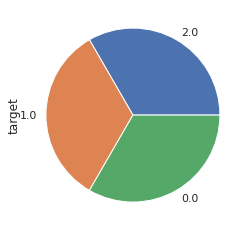

In [16]:
df.target.value_counts().plot(kind='pie')

In [17]:
data = df.copy()
target = data.pop('target')
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(data,target,random_state=42)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()}')

X_train shape (112, 4)
y_train shape (38, 4)
X_test shape (112,)
y_test shape (38,)

Test ratio: 0.75

y_train:
sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
7.9                3.8               6.4                2.0                 1
5.1                3.8               1.5                0.3                 1
5.7                3.8               1.7                0.3                 1
                   2.8               4.5                1.3                 1
5.6                2.9               3.6                1.3                 1
                   2.5               3.9                1.1                 1
5.5                3.5               1.3                0.2                 1
5.4                3.4               1.5                0.4                 1
5.2                3.5               1.5                0.2                 1
5.0                3.4               1.6                0.4                 1
7.7                2.6             

In [19]:
X_train, y_train, X_test, y_test = train_test_split(data,target,test_size = 0.3, random_state=42)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()}')

X_train shape (105, 4)
y_train shape (45, 4)
X_test shape (105,)
y_test shape (45,)

Test ratio: 0.70

y_train:
sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
7.9                3.8               6.4                2.0                 1
5.7                4.4               1.5                0.4                 1
                   2.8               4.5                1.3                 1
5.6                2.9               3.6                1.3                 1
                   2.5               3.9                1.1                 1
5.5                3.5               1.3                0.2                 1
5.4                3.9               1.3                0.4                 1
                   3.7               1.5                0.2                 1
                   3.4               1.5                0.4                 1
5.2                4.1               1.5                0.1                 1
                   3.5             

In [20]:
X_train, y_train, X_test, y_test = train_test_split(data,target,train_size = 0.9, random_state=42)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()}')

X_train shape (135, 4)
y_train shape (15, 4)
X_test shape (135,)
y_test shape (15,)

Test ratio: 0.90

y_train:
sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
7.7                2.6               6.9                2.3                 1
6.9                3.1               5.1                2.3                 1
6.8                2.8               4.8                1.4                 1
6.5                3.2               5.1                2.0                 1
6.2                2.2               4.5                1.5                 1
6.1                2.8               4.7                1.2                 1
6.0                2.9               4.5                1.5                 1
5.8                2.7               3.9                1.2                 1
5.7                3.8               1.7                0.3                 1
5.6                2.9               3.6                1.3                 1
5.5                3.5             

In [21]:
X_train, y_train, X_test, y_test = train_test_split(data,target,random_state=42, test_size= 0.1, stratify = target)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()}')

X_train shape (135, 4)
y_train shape (15, 4)
X_test shape (135,)
y_test shape (15,)

Test ratio: 0.90

y_train:
sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
7.3                2.9               6.3                1.8                 1
6.7                3.0               5.0                1.7                 1
6.6                3.0               4.4                1.4                 1
                   2.9               4.6                1.3                 1
6.5                3.0               5.5                1.8                 1
                                     5.2                2.0                 1
6.4                3.2               4.5                1.5                 1
                   2.8               5.6                2.2                 1
6.1                2.6               5.6                1.4                 1
5.8                4.0               1.2                0.2                 1
5.6                2.5             